In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
import os
 
path = os.listdir("Training")
classes = {'no_tumor':0,'pituitary_tumor':1}

In [3]:
import cv2
x=[]
y=[]
for cls in classes:
    pth='Training/'+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j,0)
        img = cv2.resize(img,(200,200))
        x.append(img)
        y.append(classes[cls])
        

In [4]:
np.unique(y)

array([0, 1])

In [5]:
x = np.array(x)
y = np.array(y)

In [6]:
pd.Series(y).value_counts()

1    827
0    395
dtype: int64

In [7]:
x.shape

(1222, 200, 200)

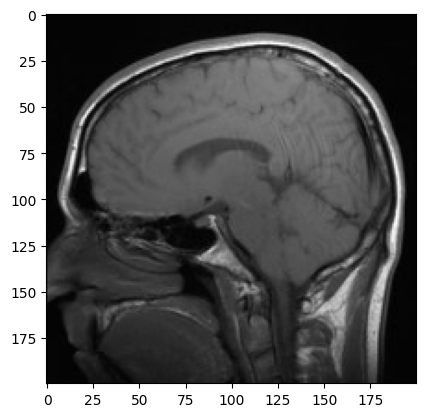

In [8]:
plt.imshow(x[0], cmap='gray')

In [9]:
x_updated = x.reshape(len(x),-1)
x_updated.shape

(1222, 40000)

In [10]:
xtrain, xtest , ytrain, ytest = train_test_split(x_updated, y , random_state = 10, test_size=.20)

In [11]:
xtrain.shape, xtest.shape

((977, 40000), (245, 40000))

In [12]:
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())
xtrain = xtrain/255
xtest = xtest/255
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())


255 0
255 0
1.0 0.0
1.0 0.0


In [13]:
from sklearn.decomposition import PCA

In [14]:
print(xtrain.shape, xtest.shape)

pca = PCA(.98)
pca_train = xtrain
pca_test = xtest

(977, 40000) (245, 40000)


In [15]:
from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC

In [20]:
import warnings
warnings.filterwarnings('ignore')
lg = LogisticRegression(C=0.1)
lg.fit(pca_train, ytrain)


LogisticRegression(C=0.1)

In [21]:
sv = SVC()
sv.fit(pca_train, ytrain)


SVC()

In [24]:
print("Training Score:", lg.score(pca_train, ytrain))
print("Testing Score:", lg.score(pca_test, ytest))

Training Score: 1.0
Testing Score: 0.9673469387755103


In [25]:
print("Training Score:", sv.score(pca_train, ytrain))
print("Testing Score:", sv.score(pca_test, ytest))

Training Score: 0.9887410440122825
Testing Score: 0.9673469387755103


In [26]:
pred = sv.predict(pca_test)
np.where(ytest!=pred)

(array([ 12,  28,  29,  37, 184, 208, 212, 236]),)

In [27]:
pred[36]

1

In [28]:
ytest[36]

1

In [ ]:
dec = {